# Pauta Control Recuperativo 1 INFO273
## Pregunta 1
Considere un servidor en el que se ha registrado para cada requerimiento, el tiempo de uso de procesador y el número de operaciones de E/S en unidades de tiempo. Los requerimientos estan asociados a solicitudes a una base de datos relacional y unos programas de edición de textos. La tabla "datosBD.csv"  contiene los datos respectivos.
Se solicita hacer una caracterización de la carga utilizando la distancia euclídea como métrica de agrupamiento.
Para ello se solicita:

1) Realizar el agrupamiento considerando la función hclust de R. Justifique los parámetros utilizados.

2) A partir del dendograma y los datos originales, decidir el número de grupos que es representativo de los distintos tipos de solicitudes. Explique su decisión. 

3) Representar en el primer plano de componentes principales, los grupos definidos. Calcular valores medios en cada grupo y realizar una interpretación de cada uno.

   Procesador..ms. E.S..s.
1              7.4    19.3
2             10.0    21.4
3              7.9    20.4
4             11.4    22.6
5              4.0    19.9
6              4.8    11.8
7              5.9    13.0
8              4.9    14.6
9              6.1    15.3
10             3.4    14.1
11             4.2   109.6
12             2.5   105.4
13             6.7   114.0
14             5.2    89.6
15             3.8    92.1
16             1.3    35.6
17             1.2    32.3
18             2.2    42.8
19             2.0    39.7
20             3.1    51.8


 Procesador..ms.    E.S..s.      
 Min.   : 1.20   Min.   : 11.80  
 1st Qu.: 2.95   1st Qu.: 18.30  
 Median : 4.50   Median : 27.45  
 Mean   : 4.90   Mean   : 44.27  
 3rd Qu.: 6.25   3rd Qu.: 61.25  
 Max.   :11.40   Max.   :114.00  

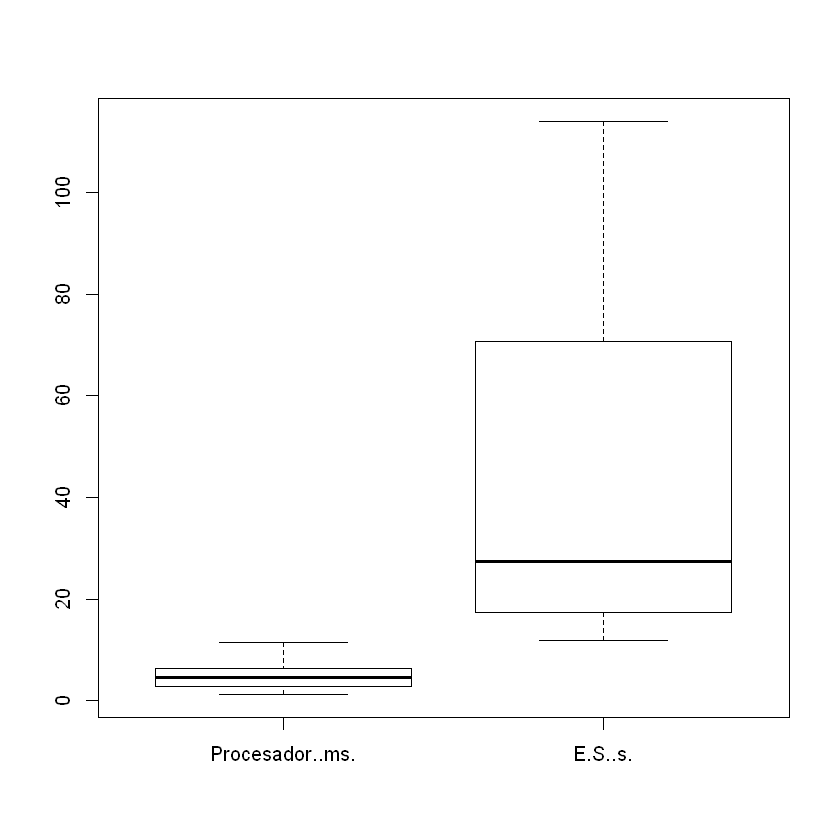

In [2]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #fila se utiliza 
#como vector de nombres de las columnas
datos <-read.table("datosBD.csv",dec=",",sep=";",header=TRUE)
datos <- datos[,2:3]
print(datos)
summary(datos)
boxplot(datos)

**Respuesta 1.1**
Al calcular las distancias se utiliza la norma Euclidiana (dist sin parámetros) porque no se le asignará mas importancia a una variable que otra. El parámetro method en la función hclust se definió como "single" que significa que se considera la menor distancia entre pares de individuos de distintos cluster, como medida de distancia entre clusters. Se escoge porque promueve la formación de grupos mas extendidos.

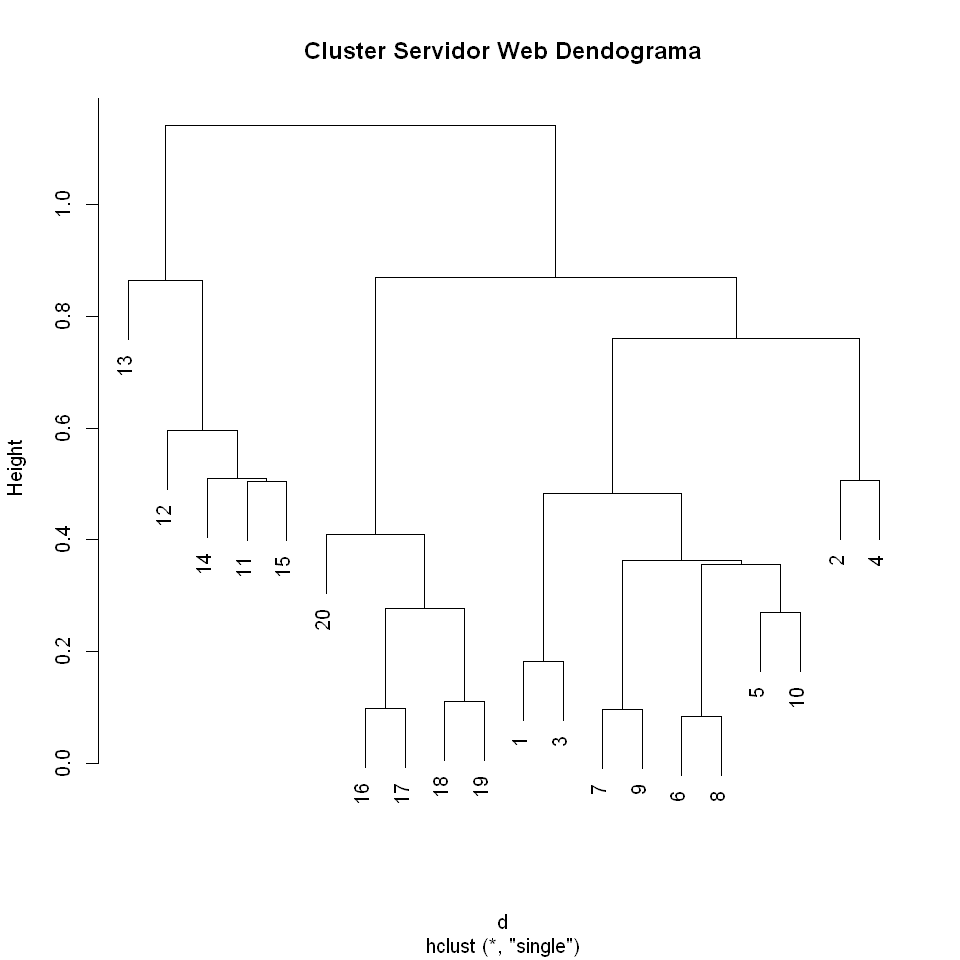

In [3]:
datos_s <-scale(datos)
d <- dist(datos_s)
hd <- hclust(d,method="single",members=NULL)
options(repr.plot.width = 8, repr.plot.height = 8)
plot(hd,labels=NULL,main="Cluster Servidor Web Dendograma",sub=NULL,xlab=NULL,ylab="Height")

**Respuesta 1.2**
Se estima hacer un corte en la altura 0.8, pues se crean 3 grupos que se pueden caracterizar.
Los datos del 1 al 10 representan requerimientos con bajo uso de E/S y relativo alto uso de CPU. Los datos del 11 al 15 representan los mayores requerimientos de E/S y uso medio de CPU. Por otra parte, los datos del 16 al 20, representa uso medio de dispositivo de E/S  y bajo uso de CPU.
A continuación se muestra un resumen estadístico por grupo:

 Procesador..ms.     E.S..s.     
 Min.   : 3.400   Min.   :11.80  
 1st Qu.: 4.825   1st Qu.:14.22  
 Median : 6.000   Median :17.30  
 Mean   : 6.580   Mean   :17.24  
 3rd Qu.: 7.775   3rd Qu.:20.27  
 Max.   :11.400   Max.   :22.60  

 Procesador..ms.    E.S..s.     
 Min.   :2.50    Min.   : 89.6  
 1st Qu.:3.80    1st Qu.: 92.1  
 Median :4.20    Median :105.4  
 Mean   :4.48    Mean   :102.1  
 3rd Qu.:5.20    3rd Qu.:109.6  
 Max.   :6.70    Max.   :114.0  

 Procesador..ms.    E.S..s.     
 Min.   :1.20    Min.   :32.30  
 1st Qu.:1.30    1st Qu.:35.60  
 Median :2.00    Median :39.70  
 Mean   :1.96    Mean   :40.44  
 3rd Qu.:2.20    3rd Qu.:42.80  
 Max.   :3.10    Max.   :51.80  

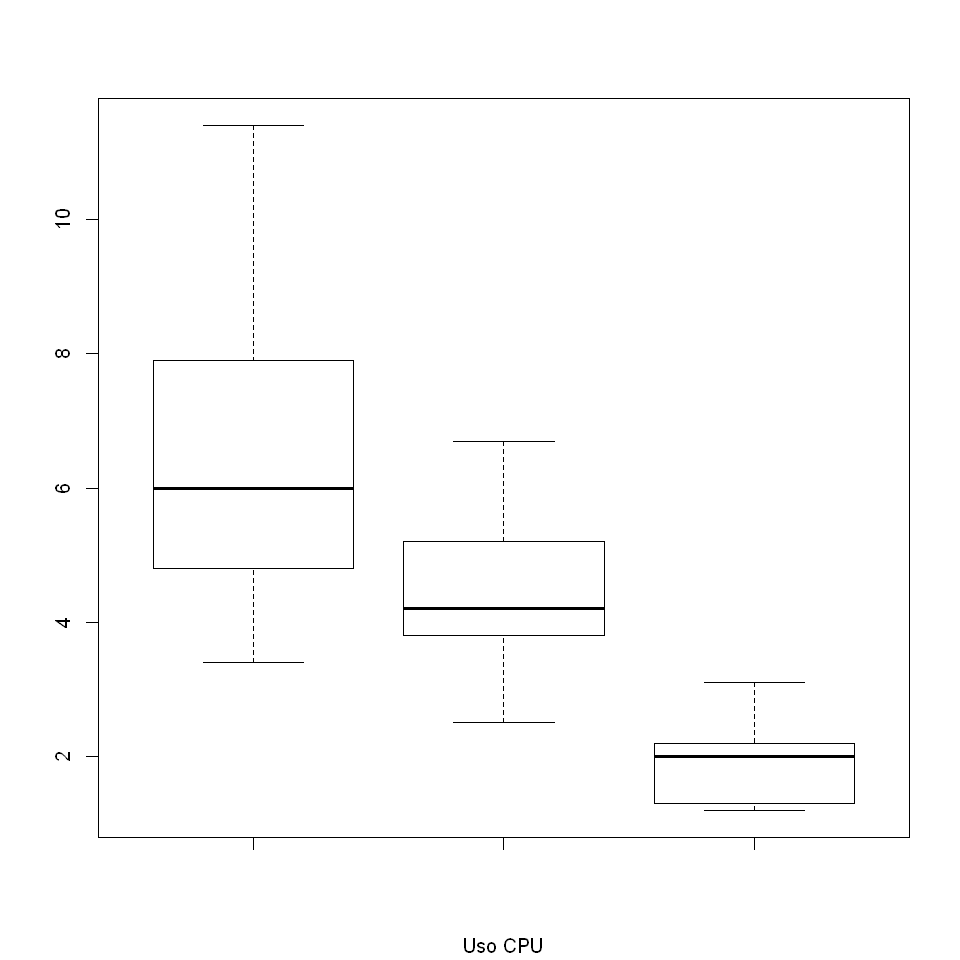

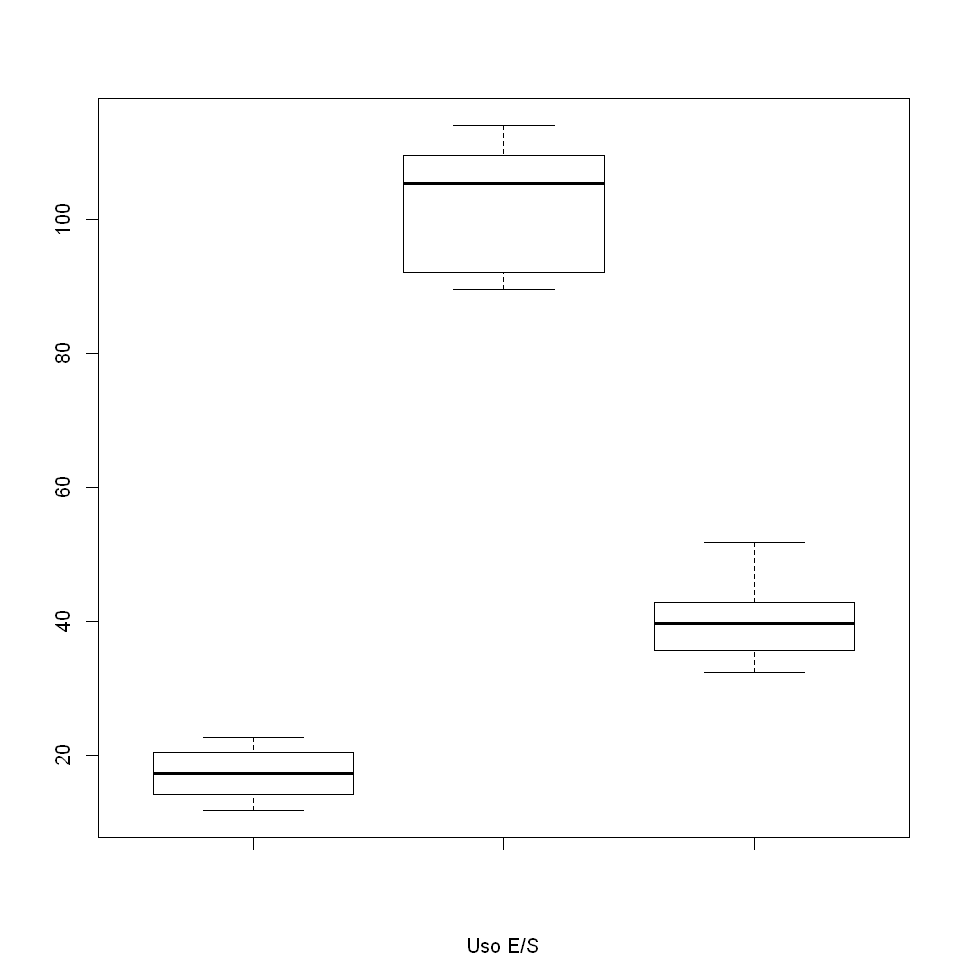

In [8]:
summary(datos[1:10,])
summary(datos[11:15,])
summary(datos[16:20,])
boxplot(datos[1:10,1],datos[11:15,1],datos[16:20,1],sub="Uso CPU")
boxplot(datos[1:10,2],datos[11:15,2],datos[16:20,2], sub="Uso E/S")

**Respuesta 1.3**
En este caso, no se pierde información en el primer plano principal, puesto que se tienen sólo dos variables. Es decir, el primer plano principa es simplemente una rotación de los ejes originales, guiada por la correlación entre las variables.
Se confirma la interpretación descrita en 1.2


Warning message:
"package 'rattle' was built under R version 3.6.3"
Rattle: A free graphical interface for data science with R.
Versión 5.3.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Escriba 'rattle()' para agitar, sacudir y  rotar sus datos.



Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.1033181 0.8846972
Proportion of Variance 0.6086555 0.3913445
Cumulative Proportion  0.6086555 1.0000000

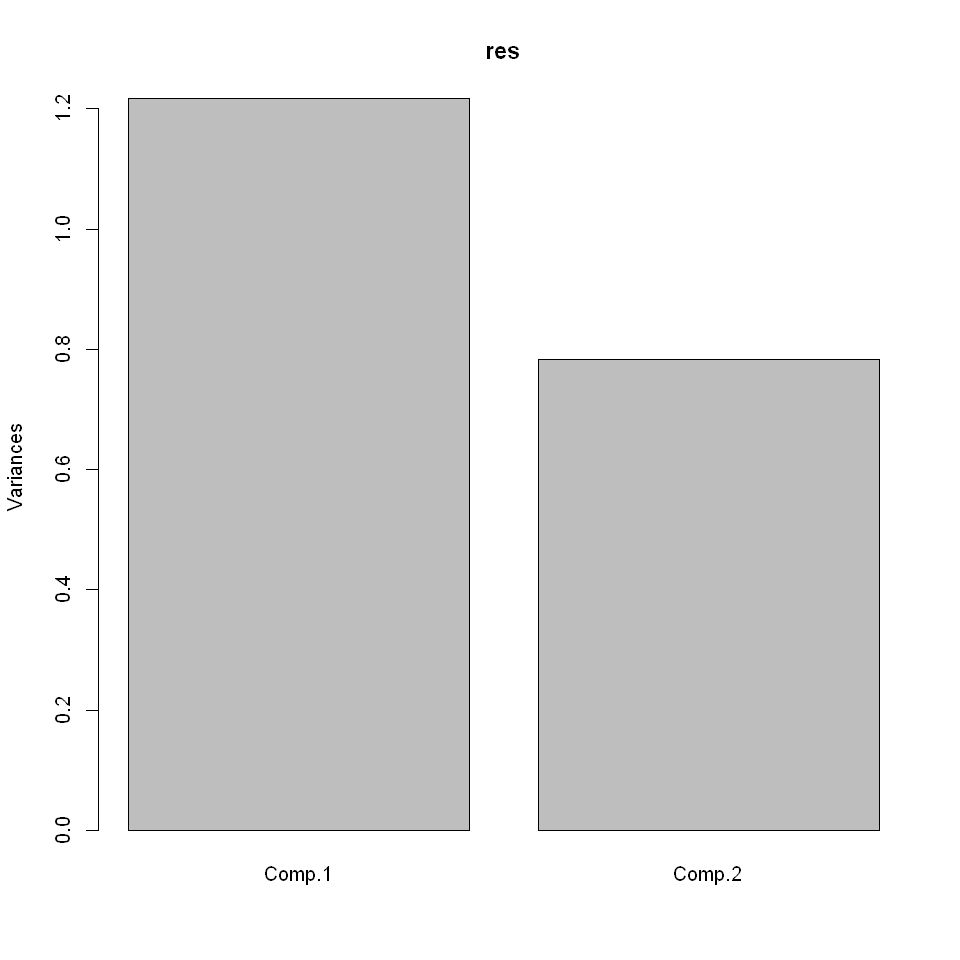

         Comp.1     Comp.2
[1,]  0.9816281 -0.1004635
[2,] -1.2688144  1.0485233
[3,] -0.6944418 -0.8475963


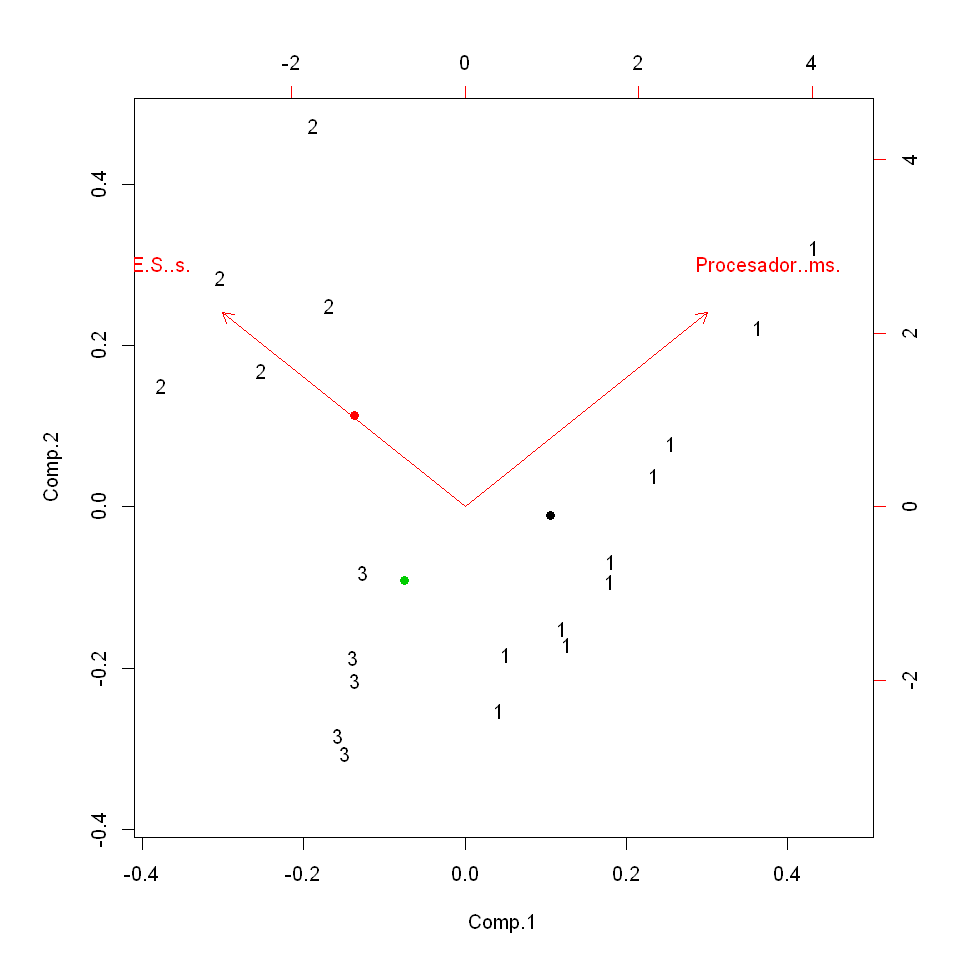

In [9]:
library(rattle)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
res <- princomp(datos, cor=TRUE)
summary(res)
plot(res)
biplot(res,xlabs=cutree(hd,3))
centros <- centers.hclust(datos,hd,3)
res2 <- predict(res,centros)
print(res2)
points(res2[,1:2],col=1:3,pch=19)

## Pregunta 2
De los resultados publicados de SPEC2017 para el índice de operaciones con coma flotante,
se ha extraído en el archivo "datosSpec.csv" los valores obtenidos con dos servidores.

Servidor A: ASUS ESC8000 G4(Z11PG-D24) Server System (3.40 GHz, Intel Xeon Gold 6246R)

Servidor B: ASUS RS700A-E9V2(KNPP-D32-R) Server System (3.20 GHz, AMD EPYC 7F72)

Para comparar su rendimiento se pide calcular:

1) El índice de prestaciones al estilo SPEC para los servidores A y B, considerando el "peak run time". Interprete sus resultados. ¿qué consecuencias tiene considerar esta serie de tiempos en lugar de "base time"?

2) Considerando la misma medida que en (1) para cada programa, comparar los rendimientos de los servidores A y B. Son significativas las diferencias?

3) Compare sus resultados en (1) y (2). Son consistentes? Interprete a la luz de las configuraciones de ambos servidores.

         Benchmark Reference_Time BaseRunTime_A PeakRunTime_A BaseRunTime_B
1     603,bwaves_s            590           100           100           105
2  607,cactuBSSN_s            167           102           102            64
3        619,lbm_s             52            47            47            87
4        621,wrf_s            132            84            82           111
5       627,cam4_s             89            90            90            89
6       628,pop2_s            119           155           153           217
7    638,imagick_s            144           113           113            68
8        644,nab_s            175            68            68            58
9  649,fotonik3d_s             91            97            96            96
10      654,roms_s            157            81            81            75
   PeakRunTime_B
1            105
2             64
3             87
4            105
5             89
6            217
7             68
8             50
9          

 Reference_Time  BaseRunTime_A    PeakRunTime_A    BaseRunTime_B   
 Min.   : 52.0   Min.   : 47.00   Min.   : 47.00   Min.   : 58.00  
 1st Qu.: 98.0   1st Qu.: 81.75   1st Qu.: 81.25   1st Qu.: 69.75  
 Median :138.0   Median : 93.50   Median : 93.00   Median : 88.00  
 Mean   :171.6   Mean   : 93.70   Mean   : 93.20   Mean   : 97.00  
 3rd Qu.:164.5   3rd Qu.:101.50   3rd Qu.:101.50   3rd Qu.:102.75  
 Max.   :590.0   Max.   :155.00   Max.   :153.00   Max.   :217.00  
 PeakRunTime_B   
 Min.   : 50.00  
 1st Qu.: 69.75  
 Median : 88.00  
 Mean   : 95.60  
 3rd Qu.:102.75  
 Max.   :217.00  

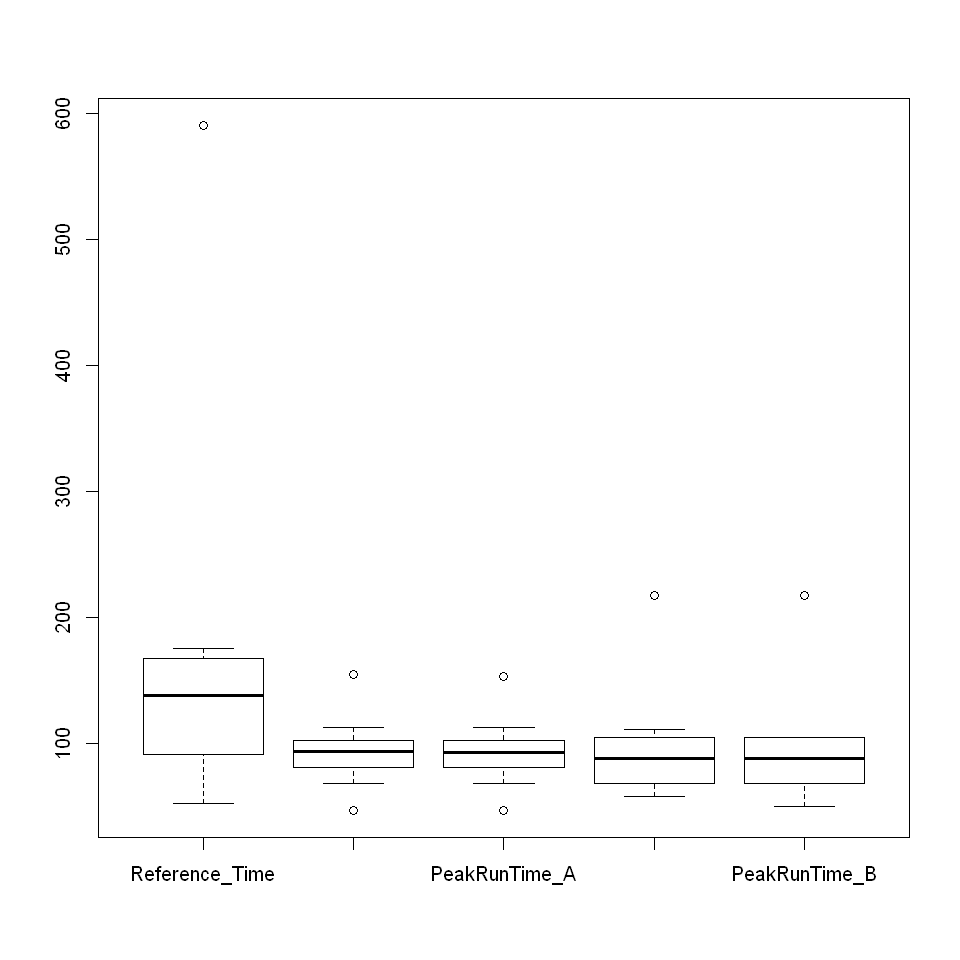

In [14]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #fila se utiliza 
#como vector de nombres de las columnas
datos <-read.table("datosSPEC.csv",sep=";",header=TRUE)
print(datos)
print(datos[,2:6])
summary(datos[,2:6])
boxplot(datos[,2:6])

**Pregunta 2.1**
Utilizaremos el calculo del índice de rendimiento a la manera de SPEC. Para ello se calculan las tasas de los tiempos de respuesta de las máquinas A y B respecto de la máquina de referencia, por cada programa, y luego se calcula la media geométrica entre ellas. Se considera el cálculo con los tiempos peak, es decir utlizando las optimizaciones que proveen los compiladores para cada máquina. En el cálculo se obtiene que la máquina B tiene un leve mayor rendimiento que la máquina A, que seguramente se debe a un mejor nivel de optimización que tienen los compiladores de la máquina B respecto de A.

In [13]:
tasaA <- datos[,2]/datos[,4]*100 
prodA <- prod(tasaA)
print(prodA^(1/10))

tasaB <- datos[,2]/datos[,6]*100
prodB <- prod(tasaB)
print(prodB^(1/10))

[1] 154.94
[1] 156.6277


**Pregunta 2.2**
Se construye el intervalo de confianza para la media de las diferencias. Para ello se calculan las diferencias y luego se obtiene media y desviación estándar y se construye el intervalo de confianza como sigue:
$$ \bar{d} \pm t_{\alpha=0.025, n-1=9} \frac{S_d}{\sqrt{n}} \qquad\qquad S_d = \sqrt{\frac{\sum_{i=1}^{10} (d_i-\bar{d})^2}{9}}\qquad\qquad t_{\alpha=0.025, n-1=9}=2,262 $$
Se puede concluir que las diferencias no son significativas ya que el intervalo contiene al cero con un grado de confianza del 95%

In [15]:
A = datos[,4]
B = datos[,6]
dif = A-B
dbar = mean(dif)
s = sd(dif)
t= qt(0.975,9)
variacion = t * s/(10^0.5)
print(dif)
print(s)
print(t)
print(variacion)
print(dbar)
print(dbar+variacion)
print(dbar-variacion)

 [1]  -5  38 -40 -23   1 -64  45  18   0   6
[1] 33.37065
[1] 2.262157
[1] 23.87192
[1] -2.4
[1] 21.47192
[1] -26.27192


**Pregunta 2.3** Hay consistencia en los resultados pues la diferencia de rendimiento que entrega el indice SPEC, en favor de la máquina B es muy pequeña. Es interesante notar que esta ventaja se invierte respecto de los tiempos base, seguramente debido a las optimizaciones de los compiladores. En relación a las propiedades del hardware, se puede apreciar que cada una tiene  ventajas y desventajas respecto de la otra: Frecuencias de los procesadores, número de núcleos, etc., que resultan compatibles con los desempeños similares.